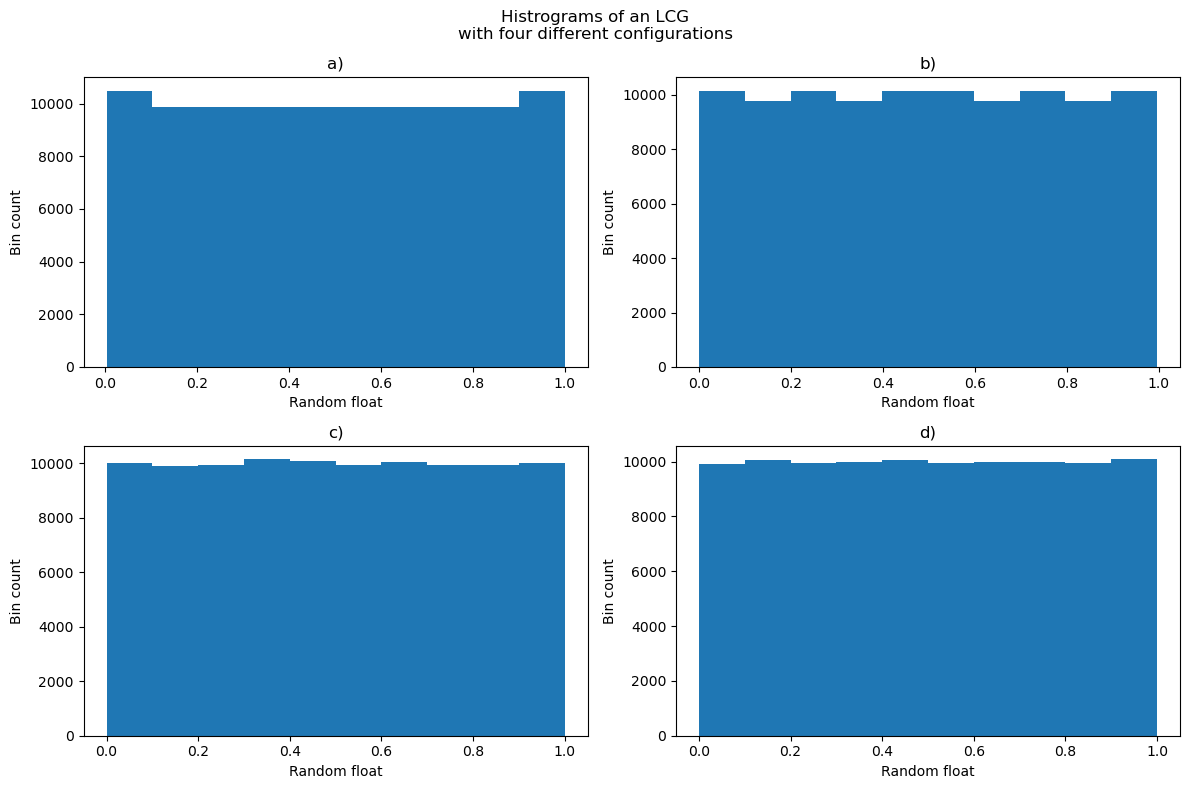

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("random_numbers.csv")

fig, axes = plt.subplot_mosaic("AB;CD", figsize=(12, 8))

titles = ["a)", "b)", "c)", "d)"]
for ax, title in zip(axes.values(), titles):
    ax.hist(df[title], 10)
    ax.set_xlabel("Random float")
    ax.set_ylabel("Bin count")
    ax.set_title(title)

fig.suptitle("Histrograms of an LCG\nwith four different configurations")

fig.tight_layout()
fig.savefig("histograms.pdf")

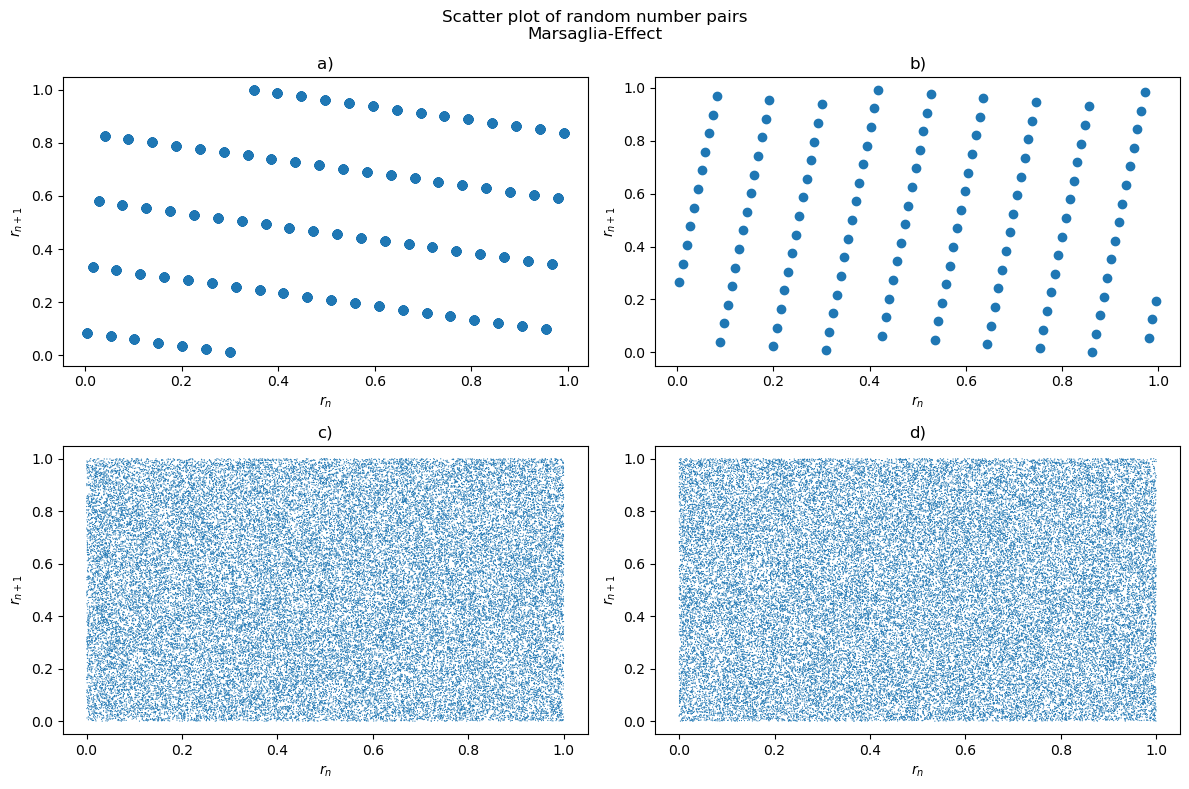

In [16]:
m = [6075, 256, 2 ** 31, 2 ** 31 - 1]

fig, axes = plt.subplot_mosaic("AB;CD", figsize=(12, 8))

titles = ["a)", "b)", "c)", "d)"]
for ax, title, m in zip(axes.values(), titles, m):
    m = m if len(df) > m else len(df)
    
    x_values = []
    y_values = []

    for n in range(0, m, 2):
        x_values.append(df.iloc[n].at[title])
        y_values.append(df.iloc[n + 1].at[title])

    if (title == "c)" or title == "d)"):
        ax.scatter(x_values, y_values, s=0.7, edgecolors="None")
    else:
        ax.scatter(x_values, y_values)

    ax.set_xlabel("$r_n$")
    ax.set_ylabel("$r_{n + 1}$")
    ax.set_title(title)

fig.suptitle("Scatter plot of random number pairs\nMarsaglia-Effect")

fig.tight_layout()
fig.savefig("correlation.pdf")
fig.savefig("correlation.png", dpi=300)